# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [241]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd

"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [242]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

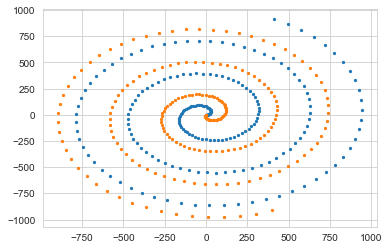

In [243]:
# Plot the two datasets to visualize the spirals
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [244]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

0    201
1    200
Name: CLASS, dtype: int64

Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [245]:
import numpy as pd

In [246]:
df['xy']=df.X*df.Y
df['x2']=df.X**2
df['y2']=df.Y**2
df['sinx']=np.sin(df.X)
df['siny']=np.sin(df.Y)


In [247]:
# your code here
df.head()

,X,Y,CLASS,xy,x2,y2,sinx,siny
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.975021,0.499167,0,2.483367,24.750832,0.249168,-0.965710,0.478694
2,9.800666,1.986693,0,19.470917,96.053050,3.946950,-0.367099,0.914754
3,14.330047,4.432803,0,63.522278,205.350257,19.649743,0.981456,-0.961170
4,18.421220,7.788367,0,143.471218,339.341342,60.658658,-0.415358,0.997848


In [248]:
X= df.drop(columns='CLASS')
y=df.CLASS

In [249]:
from sklearn.preprocessing import normalize
X_scaled = normalize(X)

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
print(X_train.shape); print(X_test.shape)

(320, 7)
(81, 7)


In [251]:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [252]:
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

learning_rate=0.001

model = Sequential()

model.add(Dense(500, input_dim=7, activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(20,activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile a model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam',),metrics=['accuracy'])

In [253]:
model.fit(X_train, y_train, epochs=500, batch_size=10)
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {},\n Loss: {}'.format(scores2[1], 1 - scores2[1], scores2[0]))   

Epoch 1/500
32/32 [==============================] - 1s 6ms/step - loss: 0.6989 - accuracy: 0.5094
Epoch 2/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4344
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5281
Epoch 4/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5250
Epoch 5/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5188
Epoch 6/500
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5312
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5344
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5344
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5469
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5344
Epoch 11/

In [255]:
# Here is the explenation of that problem that I found on this website. The code below I copied from there, but it still doesn't improve the accuracy. Therefore I will accept the results from my model above with 64% of accuracy on train and 53% on test sets.

# https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html
mymlp = Sequential()
mymlp.add(Dense(12, input_dim=7, activation='tanh'))
mymlp.add(Dense(12, activation='tanh'))
mymlp.add(Dense(12, activation='tanh'))
mymlp.add(Dense(1, activation='sigmoid'))

mymlp.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Fit the model
mymlp.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

In [256]:
mymlp.fit(X_train, y_train, epochs=500, batch_size=10)
pred_train= mymlp.predict(X_train)
scores = mymlp.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= mymlp.predict(X_test)
scores2 = mymlp.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {},\n Loss: {}'.format(scores2[1], 1 - scores2[1], scores2[0]))   

Epoch 1/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5500
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.5250
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.5312
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5188
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.4750
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6684 - accuracy: 0.5344
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5156
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.5469
Epoch 9/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.5469
Epoch 10/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.5406
Epoch 11/

Below is a method to hypereparameter tune the model for that problem

The results of the tunning also didn't get higher values of accuracy

In [257]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [258]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

In [259]:
X.shape

(401, 7)

In [261]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten())

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  # model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  # model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [262]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

INFO:tensorflow:Reloading Oracle from existing project my_dir\intro_to_kt\oracle.json
INFO:tensorflow:Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [263]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [264]:
tuner.search(X_train, y_train, epochs=150, validation_split=0.2, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit
